<a href="https://colab.research.google.com/github/amanullahshah32/Machine-Learning/blob/main/Linear_Regression_Practice/Medical_Charges_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd

In [90]:
medical_df =  pd.read_csv('/content/drive/MyDrive/Datasets/medical-charges.csv')

In [91]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Analysis and Visualization

In [94]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [95]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [96]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [97]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# Body Mass Index

In [98]:
fig = px.histogram(medical_df, x= 'bmi',  marginal= 'box', color_discrete_sequence=['red'], title= 'Distribuition of BMI (body mass index)')
fig.update_layout(bargap= 0.1)
fig.show()

# Charges

In [99]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color= 'smoker', color_discrete_sequence= ['green', 'grey'], title = 'Annual Medical charges')
fig.update_layout(bargap= 0.1)
fig.show()

# Smoker

In [100]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [101]:
px.histogram(medical_df, x= 'smoker', color= 'children', title= 'smoker')

# Age and Charges

In [102]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# BMI and Charges

In [103]:
fig = px.scatter(medical_df, x= 'bmi', y = 'charges', opacity= 0.9, hover_data='sex', color= 'smoker', title = 'BMI vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

In [104]:
fig = px.violin(medical_df, x= 'bmi', y = 'charges',  color= 'smoker', title = 'BMI vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

# Correlation

In [105]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [106]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

### Label encoding of sex column to find the correlation between charges and sex

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
le = LabelEncoder()

# Convert 'sex' column to numerical values
medical_df['sex_encoded'] = le.fit_transform(medical_df['sex'])
medical_df['smoker_encoded'] = le.fit_transform(medical_df['smoker'])

In [109]:
medical_df.charges.corr(medical_df.sex_encoded)

0.057292062202025484

In [110]:
# sex_map = {'female': 0 , 'male':1}
# sex_numeric = medical_df.sex.map(sex_map)
# medical_df.charges.corr(sex_numeric)

In [111]:
medical_df.charges.corr(medical_df.smoker_encoded)

0.787251430498478

In [112]:
# smoker_values = {'no': 0, 'yes': 1}
# smoker_numeric = medical_df.smoker.map(smoker_values)
# medical_df.charges.corr(smoker_numeric)

In [113]:
medical_df.corr()

<ipython-input-113-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges,sex_encoded,smoker_encoded
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
sex_encoded,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
smoker_encoded,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


<ipython-input-114-3fe40db7928d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation matrix')

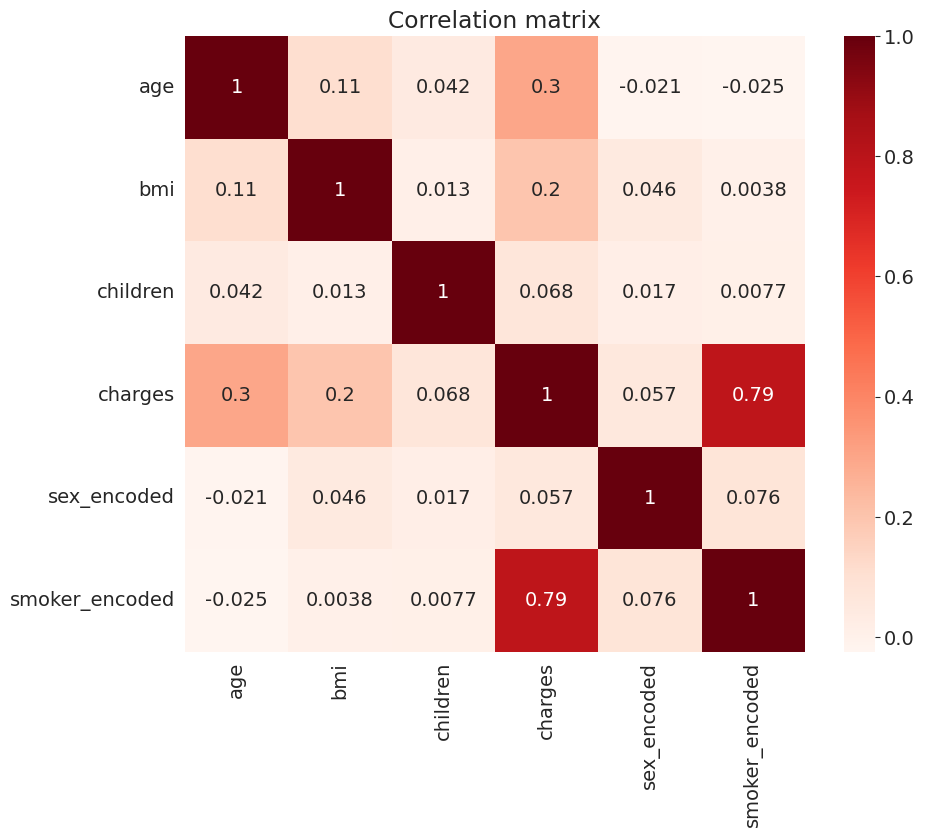

In [114]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot= True)
plt.title('Correlation matrix')

# Linear Regression using a Single Feature

In [115]:
non_smoker_df = medical_df[medical_df.smoker== 'no']

Text(0.5, 1.0, 'age vs charges')

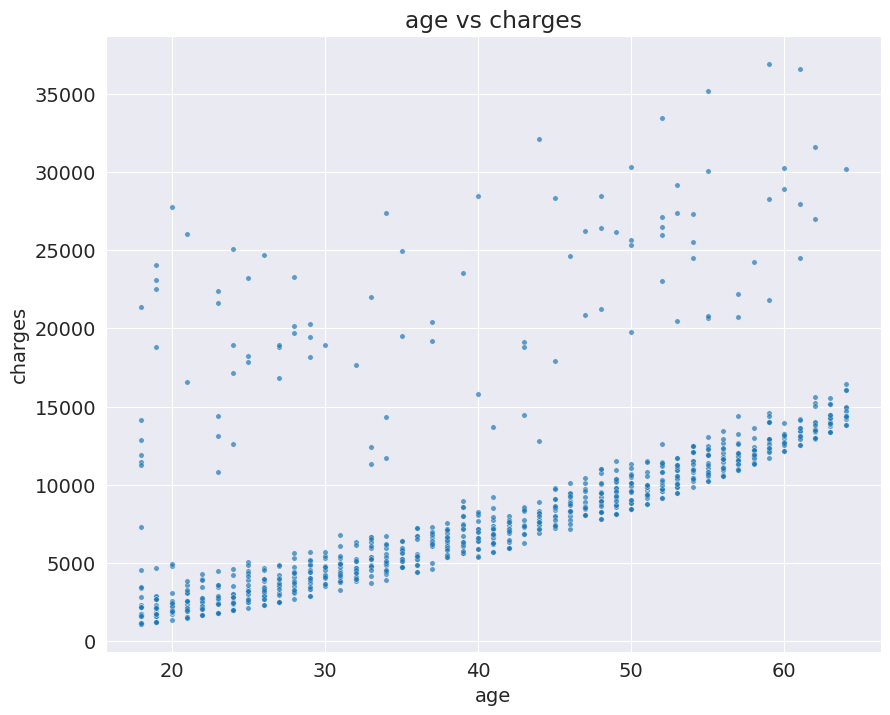

In [116]:
sns.scatterplot(non_smoker_df, x= 'age', y='charges', alpha= 0.7, s=15);
plt.title('age vs charges')

In [117]:
# y = wx + b

# charges = w * age + b

# Model

In [118]:
def estimate_charges(age, w, b):
  return w*age +b

In [119]:
w= 50
b = 100

In [120]:
ages = non_smoker_df.age
probable_charge = estimate_charges(ages, w, b)
probable_charge

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'probable charges')

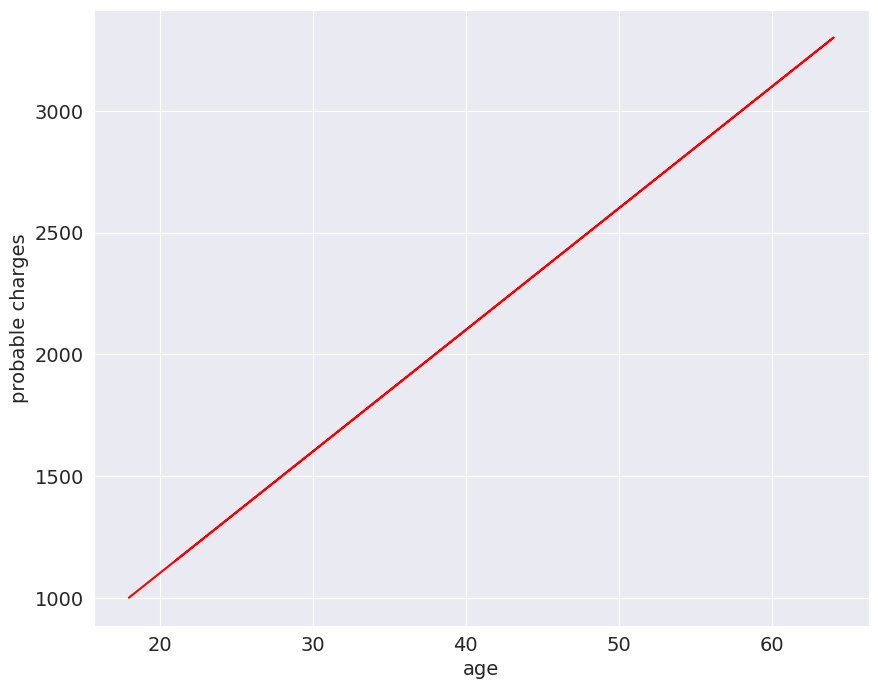

In [121]:
plt.plot(ages, probable_charge, 'r')
plt.xlabel('age')
plt.ylabel('probable charges')

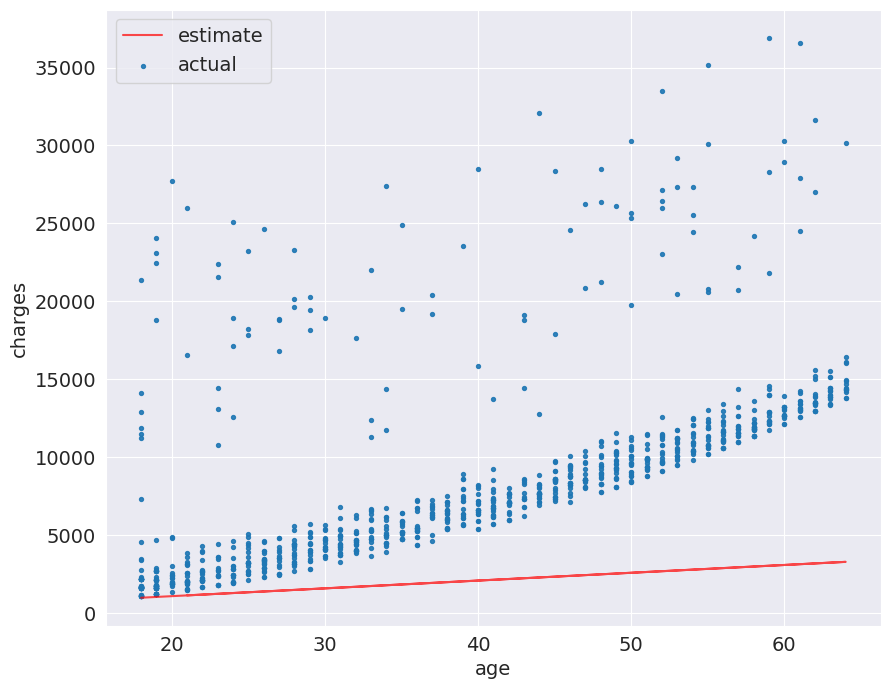

In [122]:
target = non_smoker_df.charges
plt.plot(ages, probable_charge, 'r', alpha = 0.7)
plt.scatter(ages, target, s=8, alpha=0.9)
plt.xlabel("age")
plt.ylabel('charges')
plt.legend(['estimate','actual'])

In [123]:
def try_parameter(w,b):
  ages= non_smoker_df.age
  target = non_smoker_df.charges

  probable_charge = estimate_charges(ages, w,b)

  plt.plot(ages, probable_charge, 'r', alpha = 0.9)
  plt.scatter(ages, target, s=8, alpha =0.8)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['estimate', 'actual'])

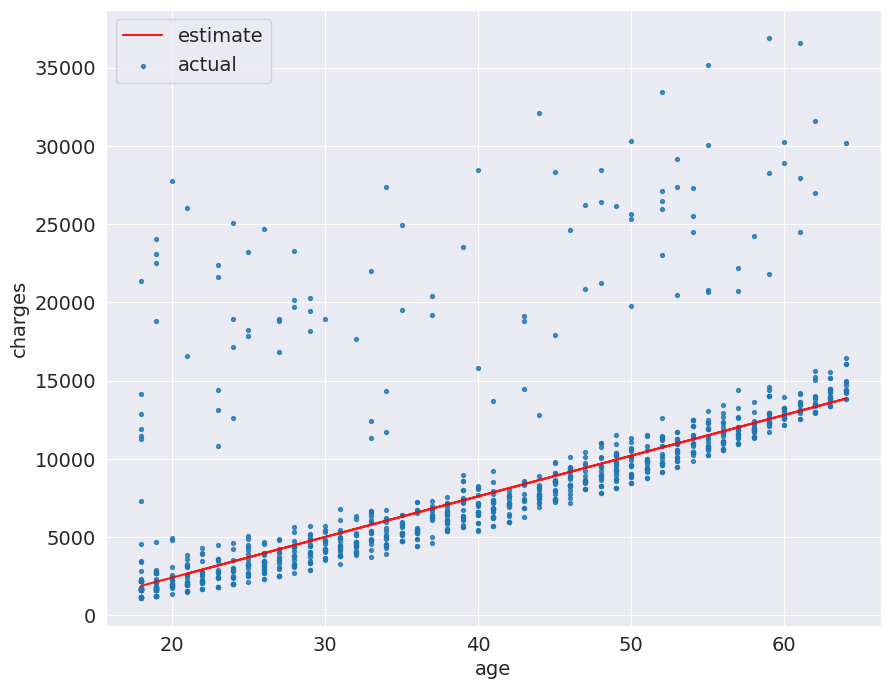

In [124]:
try_parameter(260,-2800)

In [125]:
import numpy as np


In [126]:
def rmse(targets, predictions ):
  return np.sqrt(np.mean(np.square(targets-predictions)))

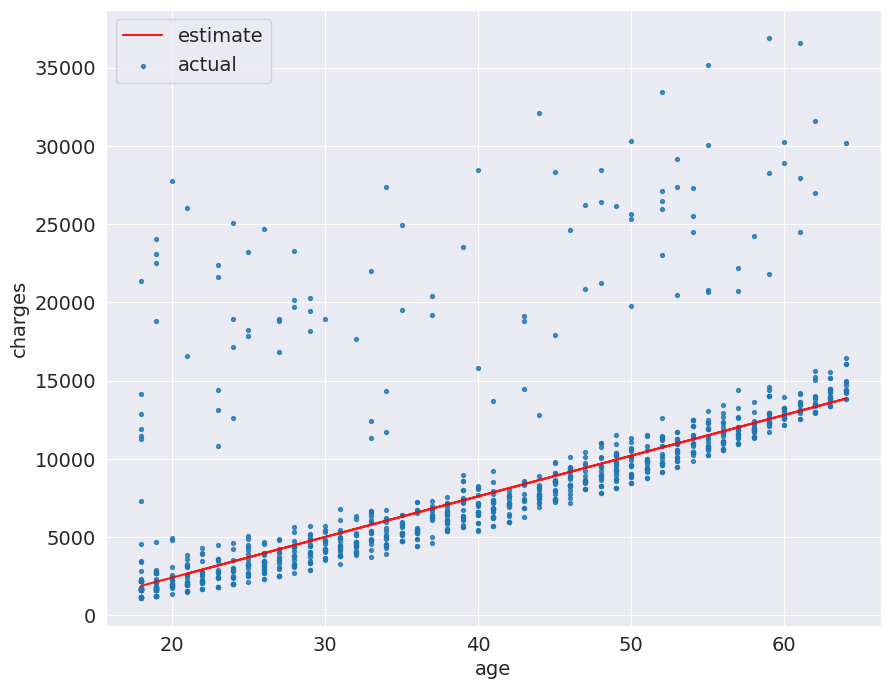

In [127]:
try_parameter(260,-2800)

In [128]:
targets = non_smoker_df.charges
w= 260
b= -2800
predicted = estimate_charges(non_smoker_df.age, w,b)

In [129]:
rmse(targets, predicted)

4768.39261962649

In [130]:
def try_parameter(w,b):
  ages= non_smoker_df.age
  target = non_smoker_df.charges

  probable_charge = estimate_charges(ages, w,b)

  plt.plot(ages, probable_charge, 'r', alpha = 0.9)
  plt.scatter(ages, target, s=8, alpha =0.8)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['estimate', 'actual'])

  loss = rmse(targets, predicted)
  print('rmse loss: ', loss)

In [131]:
#try_parameter(250, -2850)

In [132]:
#

# Linear Regression using Scikit - learn

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
model = LinearRegression()

In [135]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [136]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape:  ', inputs.shape)
print('targets.shape:  ', targets.shape)

inputs.shape:   (1064, 1)
targets.shape:   (1064,)


In [137]:
model.fit(inputs, targets)

LinearRegression()

In [138]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [139]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [140]:
# rmse(targets, predictions)

In [141]:
model.coef_

array([267.24891283])

In [142]:
model.intercept_


-2091.4205565650864

rmse loss:  4768.39261962649


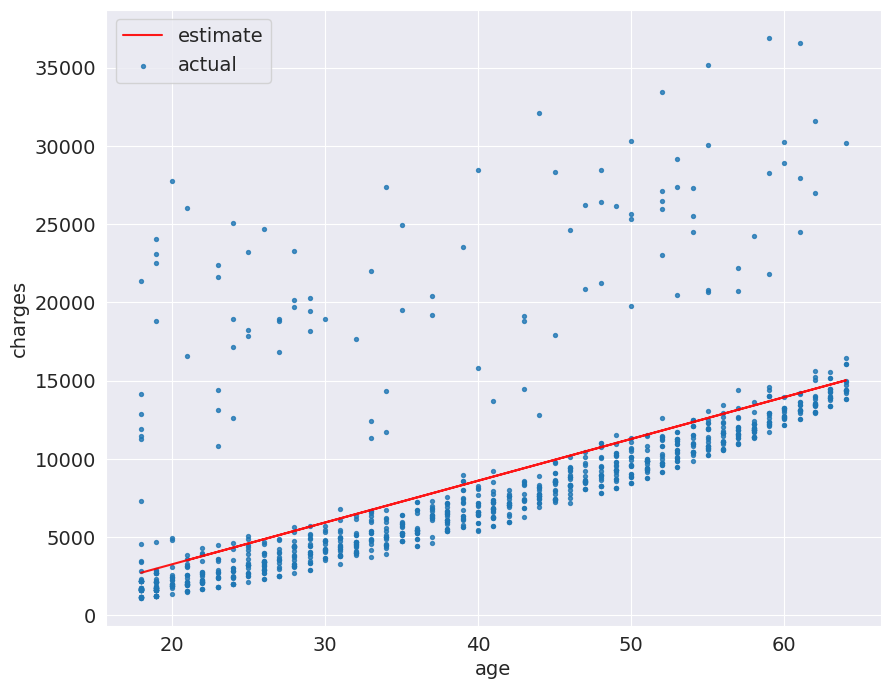

In [143]:
try_parameter(model.coef_,model.intercept_)

# SGDRegressior using SCIKIT Learn

In [144]:
from sklearn.linear_model import SGDRegressor

In [145]:
model2 = SGDRegressor()

In [146]:
model2.fit(inputs, targets)

SGDRegressor()

rmse loss:  4768.39261962649


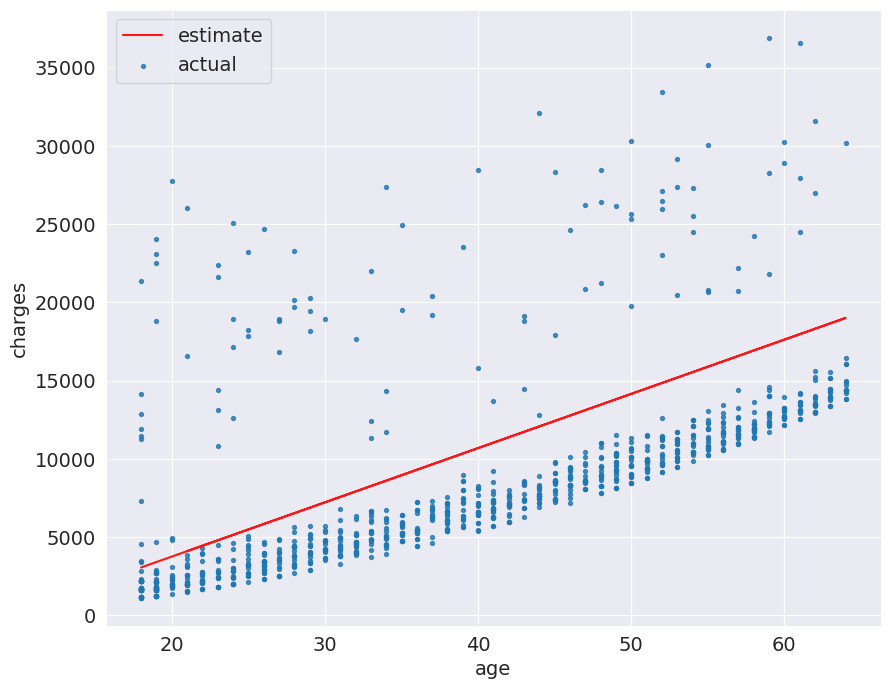

In [147]:
try_parameter(model2.coef_, model2.intercept_)

# Linear Regression using **smokerss**

In [148]:
medical_df

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [149]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']


Text(0.5, 1.0, 'smoker age vs charges graph')

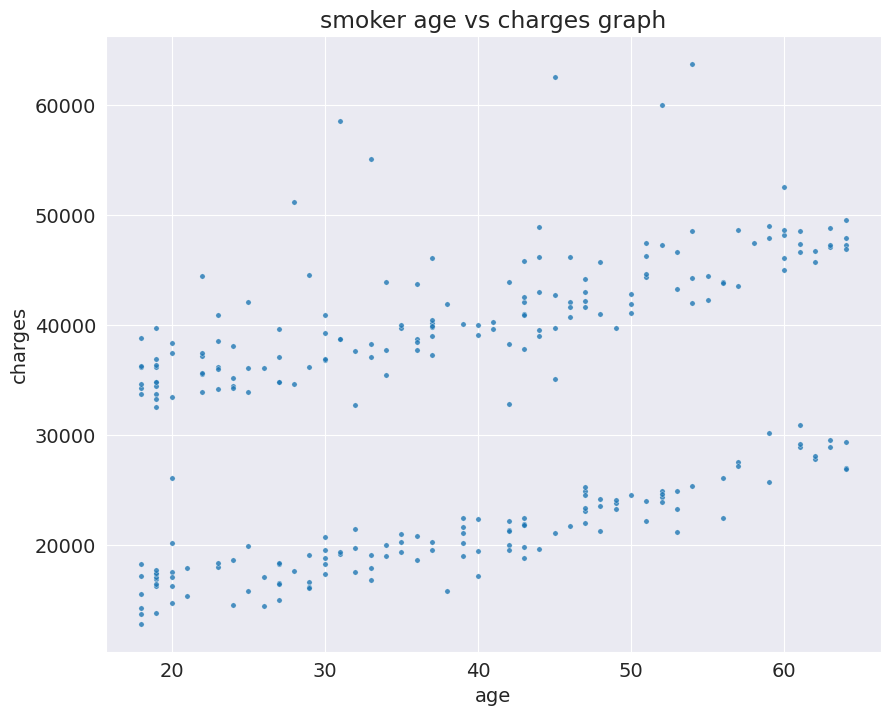

In [150]:
sns.scatterplot(smoker_df, x='age', y='charges', alpha= 0.8, s=15)
plt.title('smoker age vs charges graph')

In [151]:
def smoker_charges(age, w, b):
  return w*age +b


In [152]:
ages = smoker_df.age


In [153]:
def rmse2(target, smoker_bills):
    return np.sqrt(np.mean(np.square(target - smoker_bills)))


In [154]:
def try_smoker_bills(w,b):

  smoker_bills= smoker_charges(ages, w, b)

  target= smoker_df.charges
  plt.plot(ages, smoker_bills, 'r')
  plt.scatter(ages, target, s=8, alpha = 0.9  )
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['predicted','actual'])

  loss2 = rmse2(target, smoker_bills)
  print('rmse2 loss : ', loss2)





rmse2 loss :  28571.401992574898


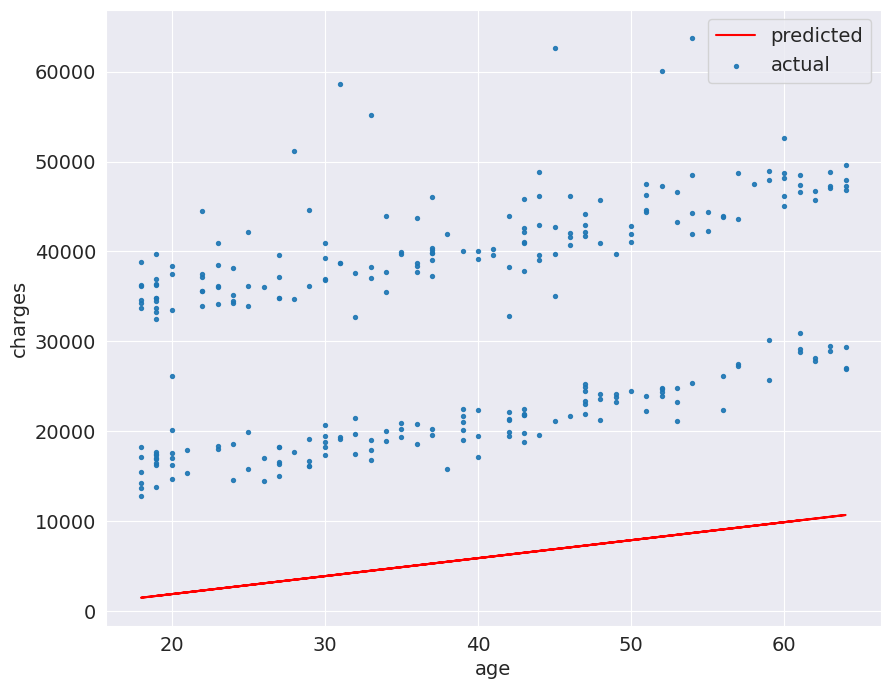

In [155]:
try_smoker_bills(200, -2100)

### Skicit Learn for linear regression of smoker df

In [156]:
def rmse2(target_bill, predicted_bill):
  return np.sqrt(np.mean(np.square(predicted_bill - target_bill)))

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model3= LinearRegression()

In [159]:
inputs3= smoker_df[['age']]
targets3 = smoker_df.charges
print('inputs shape', inputs3.shape)
print('targets shape: ', targets3.shape)

inputs shape (274, 1)
targets shape:  (274,)


In [160]:
model3.fit(inputs3, targets3)

LinearRegression()

In [161]:
model3.predict(np.array([[24],
                        [33],
                        [40]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27619.83057755, 30366.96899654, 32503.63221131])

In [162]:
model3.coef_

array([305.23760211])

In [163]:
model3.intercept_

20294.128126915966

In [164]:
rmse2(model3.coef_, model3.intercept_)

19988.89052480614

rmse2 loss :  10711.00334810241


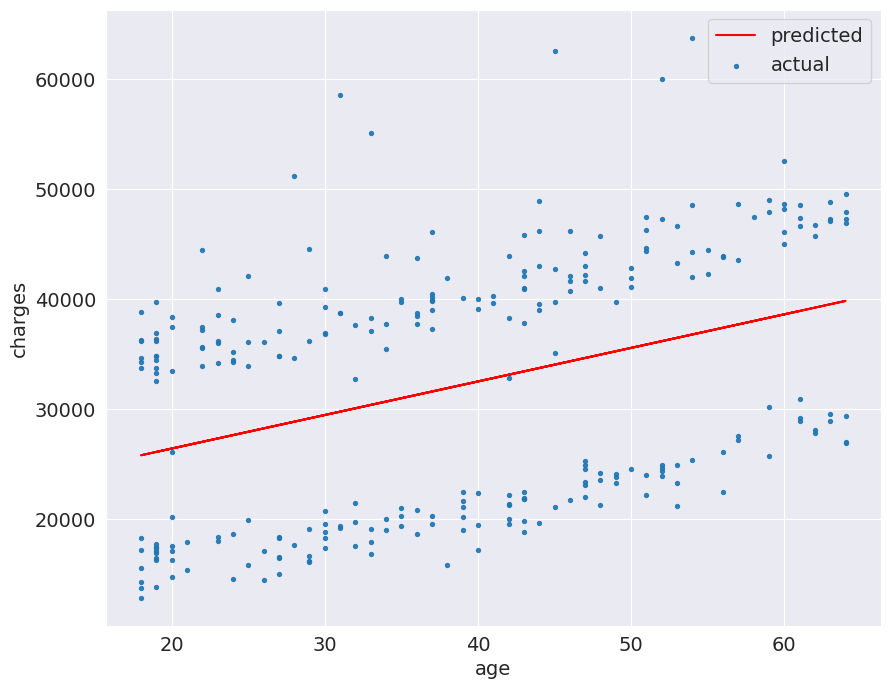

In [165]:
try_smoker_bills(model3.coef_, model3.intercept_)

# **Machine Learning**

![image.png]()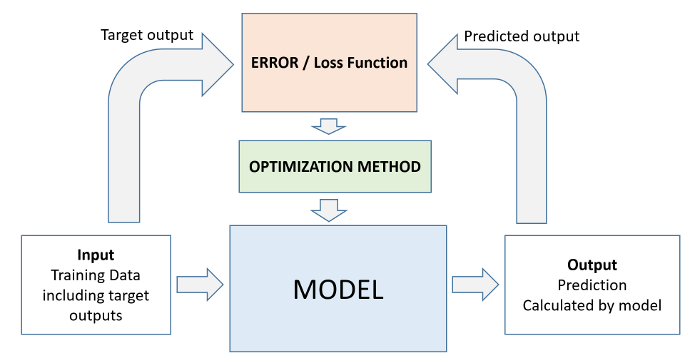

In [167]:
# create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

# generate predictions
prediction = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse2(targets, prediction)
print('loss: ', loss)

loss:  4662.505766636395


## Exploratory Analysis and Visualization practice

In [168]:
# @title
# AGE

fig = px.histogram(medical_df, x= 'age', marginal = 'box', nbins = 47, title= 'distribution of age')
fig.update_layout(bargap= 0.1)
fig.show()

In [169]:
# @title
# BMI

fig2 = px.histogram(medical_df, x= 'bmi', marginal = 'box', color_discrete_sequence=['red'], title='distribution of BMI (body mass index)')
fig2.update_layout(bargap=0.8)
fig2.show()

In [170]:
# @title
# Age and Charges

fig3 = px.scatter(medical_df, x='age', y = 'charges', color= 'smoker', hover_data='sex', title='age vs charges', opacity=0.9)
fig3.update_traces(marker_size=5)
fig3.show()

<ipython-input-171-203844b9bc87>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'correlation matrix')

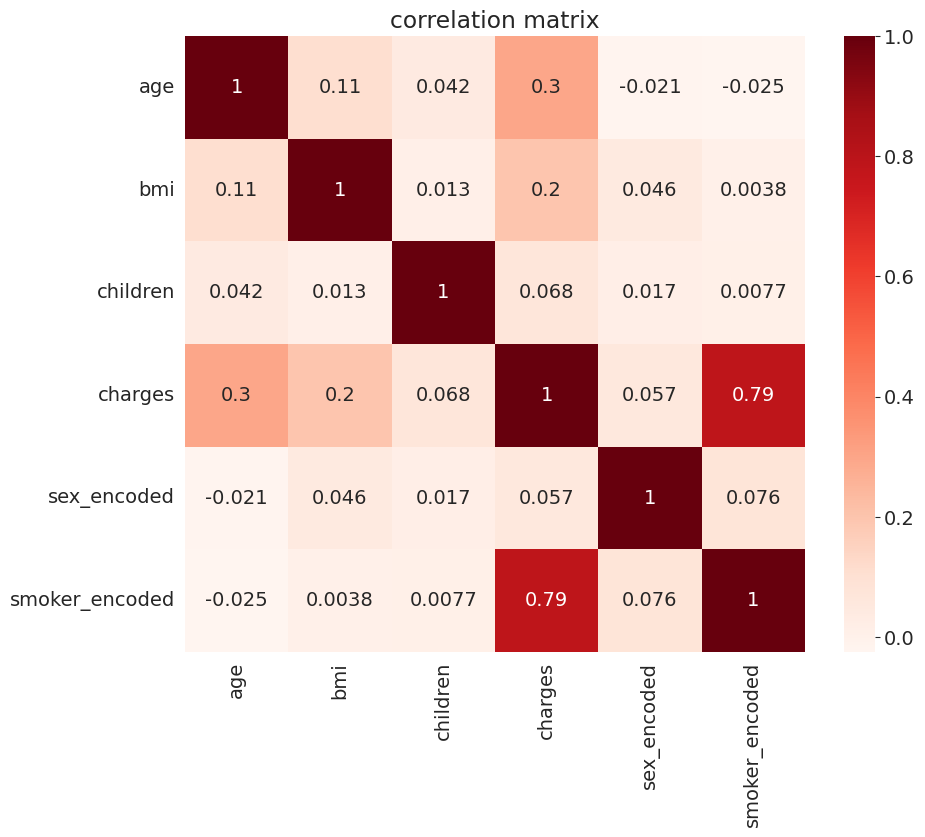

In [171]:
# correlation matrix

sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('correlation matrix')

# **Linear Regression using Multiple Features**

loss:  4662.3128354612945
coefficient w is :  266.876578165998
coefficient w is :  7.075476658142241
intercept b is :  -2293.6320906488727


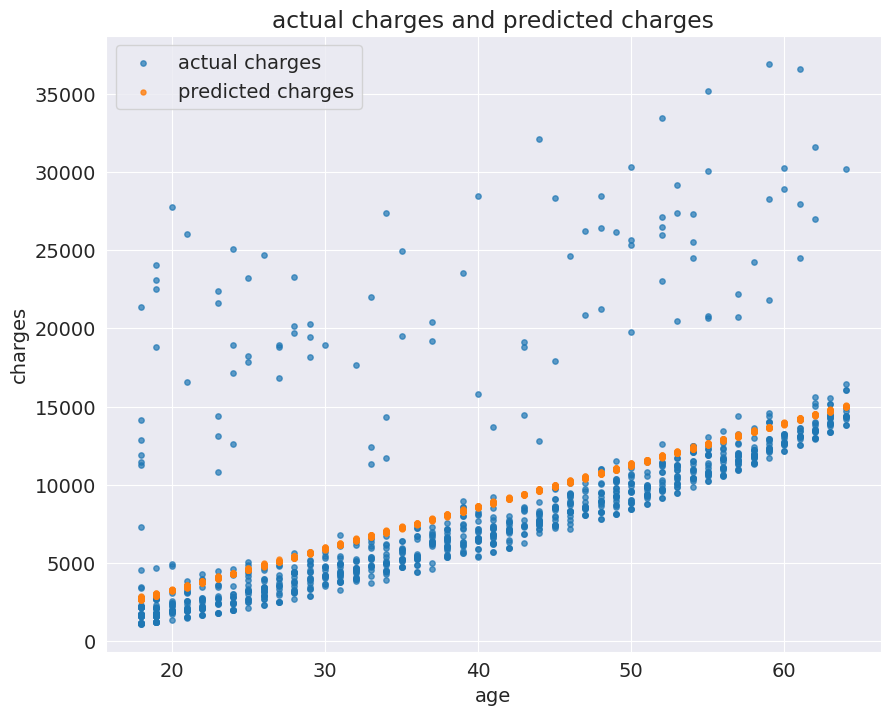

In [173]:
# charges = (w1*age) + (w2*bmi) + b

#create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# create and train the model
model = LinearRegression().fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse2(targets, predictions)

print('loss: ', loss)

print('coefficient w is : ', model.coef_[0])
print('coefficient w is : ', model.coef_[1])

print('intercept b is : ', model.intercept_)

plt.scatter(non_smoker_df.age, targets, label='actual charges', alpha = 0.7, s=15)
plt.scatter(non_smoker_df.age, predictions, label='predicted charges', alpha = 0.8, s= 13)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.title('actual charges and predicted charges')
plt.show()



In [177]:
#correlation between bmi and charges
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
#visualize relationship between bmi and charges using seaborn

plt.title('bmi vs charges')
sns.scatterplot(non_smoker_df, x='bmi', y='charges', alpha= 0.8, s= 15)

In [181]:
#visualize relationship between bmi and charges using plotly

fig = px.scatter(non_smoker_df, x= 'bmi', y='charges', title='bmi vs charges')
fig.update_traces(marker_size= 5)
fig.show()

In [184]:
# 3D scatter plot

fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [185]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

## Linear Regression model using only BMI

loss:  5969.772531913293
coefficient W:  83.35055766172228
intercept B:  5879.424081872975


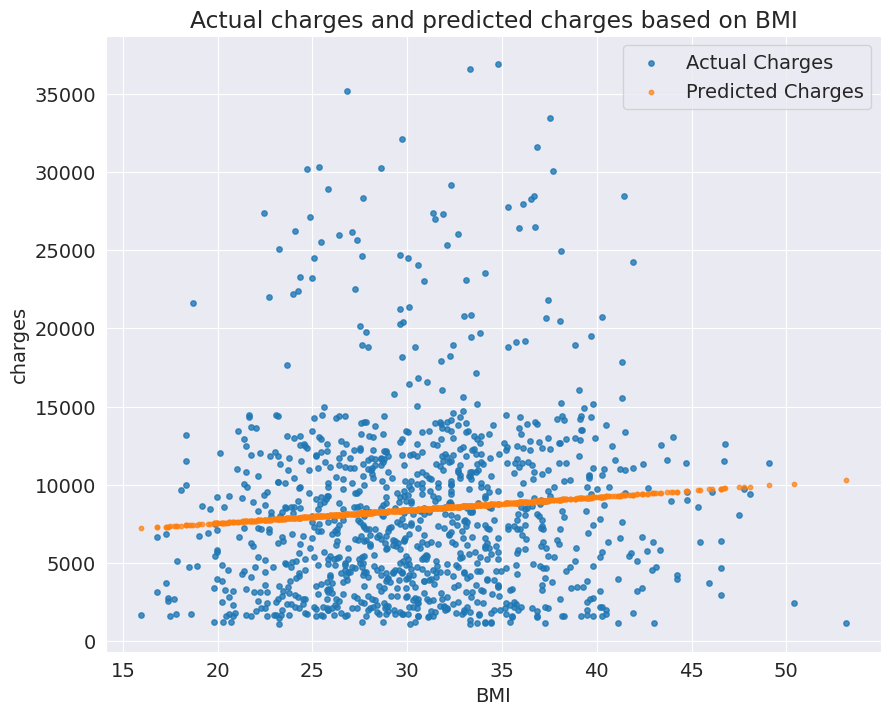

In [188]:
# create inputs and targets
inputs, targets = non_smoker_df[['bmi']], non_smoker_df['charges']

#create and train the model
model= LinearRegression().fit(inputs,targets)

#generate prediction
predictions= model.predict(inputs)

#compute loss to evaluate the model
loss = rmse2(targets, predictions)
print('loss: ', loss)

print('coefficient W: ', model.coef_[0])
print('intercept B: ', model.intercept_)


#visualization:

plt.scatter(non_smoker_df['bmi'], targets, label='Actual Charges', alpha= 0.8, s=15)
plt.scatter(non_smoker_df['bmi'], predictions, label='Predicted Charges', alpha= 0.7, s=10)
plt.xlabel('BMI')
plt.ylabel('charges')
plt.legend()
plt.title('Actual charges and predicted charges based on BMI')
plt.show()